# How well do jobs and skills pay for Data Amalysts?

### Methodology

1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

In [1]:
#importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
#filtering data analyst and US
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

In [7]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [8]:
#filtering if job titles are in job title short column
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [14]:
#sorting by yaxis
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

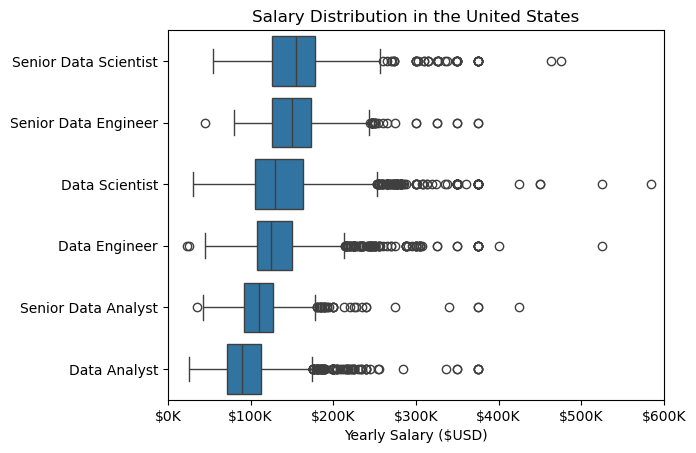

In [15]:
import seaborn as sns

sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()

# Investigating Median Salary Vs Skill for Data Analysts

In [ ]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title'] == 'Data Analyst')].copy()

df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

In [20]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
1681,111175.0,sql
1681,111175.0,tableau
1681,111175.0,power bi
1681,111175.0,excel
3237,120000.0,sql


In [31]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median',ascending=False)
df_DA_top_pay = df_DA_top_pay.head(10)
df_DA_top_pay

,count,median
job_skills,,
golang,1,145000.0
redis,1,128500.0
elasticsearch,3,128500.0
dynamodb,1,115000.0
mongodb,14,115000.0
jupyter,5,115000.0
bitbucket,1,111175.0
ssis,23,110000.0
gcp,12,106250.0


In [ ]:
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count',ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False) #sorting by median because of plotting
df_DA_skills

,count,median
job_skills,,
aws,75,92500.0
python,408,90000.0
tableau,398,90000.0
r,244,90000.0
sql,714,87500.0
power bi,279,87500.0
sas,200,84078.5
excel,472,77500.0
powerpoint,102,77500.0


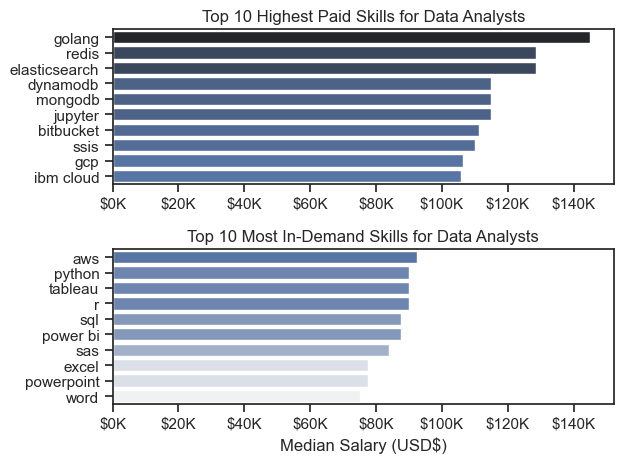

In [34]:
fig, ax = plt.subplots(2,1)

sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
sns.set_theme(style="ticks")


ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[0].legend().remove()

sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b')

ax[1].set_xlim(ax[0].get_xlim()) 
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD$)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].legend().remove()

fig.tight_layout()